<a href="https://colab.research.google.com/github/wandieinnocents/sales_analysis_pyhon_thesis_v3/blob/main/v3_A_MULTIMODAL_ML_FRAMEWORK_FOR_BUSINESS_PERFORMANCE_ANALYSIS_Research_progress_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS  PERFORMANCE ANALYSIS

In this research, I utilize Python Pandas and Python Matplotlib to evaluate and respond to business queries regarding sales data from the previous 12 months. The information includes hundreds of thousands of electronics store purchases that are split down by month, product type, price, location of purchase, and other factors. This research can provide a 12-month performance history for the company.

TABLE OF CONTENTS
- Data loading
- Cleaning null values
- Which city had the highest number of sales
- Total  number of sales per year


The purpose of the research

In [51]:
# import libraries
import pandas as pd
import os


In [52]:

# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [53]:
# read the dataset for supermarket sales
df = pd.read_csv("/content/drive/MyDrive/research1/supermarket_grocery_sales.csv")

In [54]:
# display the dataset
df

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


CHECKING AND CLEANING OF NULL VALUES

In [55]:
# Checking for null values using isnull()
print(df.isnull())

      Order ID  Customer Name  Category  Sub Category   City  Order Date  \
0        False          False     False         False  False       False   
1        False          False     False         False  False       False   
2        False          False     False         False  False       False   
3        False          False     False         False  False       False   
4        False          False     False         False  False       False   
...        ...            ...       ...           ...    ...         ...   
9989     False          False     False         False  False       False   
9990     False          False     False         False  False       False   
9991     False          False     False         False  False       False   
9992     False          False     False         False  False       False   
9993     False          False     False         False  False       False   

      Region  Sales  Discount  Profit  State  
0      False  False     False   False  F

In [56]:
# count the number of null values if exists
print(df.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [57]:
# remove all the null values from dataset if exists
df=df.dropna(how='all')

CLEANED DATASET

In [58]:
# cleaned dataset
df.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


#What City had the highest number of sales


In [59]:
# compute
city_highest_sales = df.groupby('City').sum()
city_highest_sales
# https://www.atmosera.com/blog/using-pandas-to-analyze-sales-data/

<ipython-input-59-35cf8c82f319>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_highest_sales = df.groupby('City').sum()


,Sales,Discount,Profit
City,,,
Bodi,667177,97.73,173655.13
Chennai,634963,97.75,160921.33
Coimbatore,634748,95.07,157399.41
Cumbum,626047,96.07,156355.13
Dharmapuri,571553,86.06,141593.05
Dindigul,575631,87.57,144872.95
Kanyakumari,706764,102.57,172217.74
Karur,642273,97.52,169305.94
Krishnagiri,637273,100.05,160477.48


<Axes: xlabel='City'>

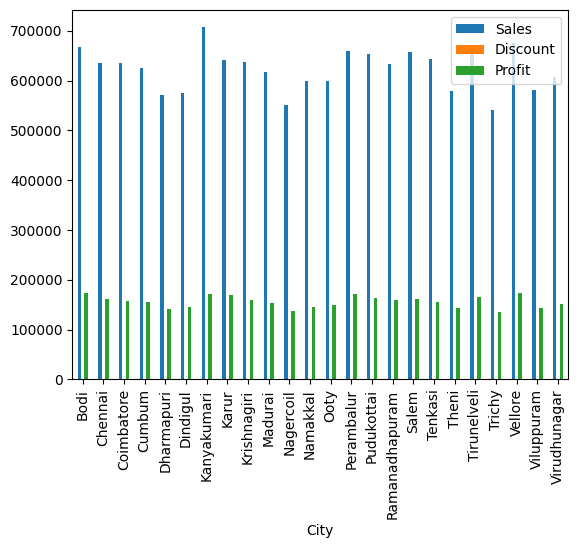

In [64]:
# plot city with higest number of customers
city_highest_sales.plot(kind='bar')

##TOTAL NUMBER OF SALES PER YEAR

In [61]:
# total number of sales per year
